<a href="https://colab.research.google.com/github/Luke-zm/ev_charge_ana/blob/yy/ev_charging_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the necessary packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import datetime for datetime processing
from datetime import datetime, timedelta

In [ ]:
# Import the CSV file to work with
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/main/pre_ana_data/updated_combined_ev_charging_data.csv"
leeds_comb_df = pd.read_csv(url)
leeds_comb_df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,charging_cost,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,31/12/2014,11:25,31/12/2014,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,30/12/2014,13:58,30/12/2014,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,381777,14Q3User 38,70201,2,27/12/2014,18:13,27/12/2014,19:08,0.00,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN,2014-12-27 18:13:00,2014-12-27 19:08:00,0.916667,Saturday,Saturday,evening,evening
3,380951,14Q3User 629,70208,1,24/12/2014,11:37,24/12/2014,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
4,377470,14Q3User 626,70204,2,18/12/2014,09:29,18/12/2014,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning


In [ ]:
leeds_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   charging_event_id  24224 non-null  int64  
 1   user_id            24224 non-null  object 
 2   cp_id              24224 non-null  int64  
 3   con_num            24224 non-null  int64  
 4   start_date         24224 non-null  object 
 5   start_time         24224 non-null  object 
 6   end_date           23927 non-null  object 
 7   end_time           23927 non-null  object 
 8   total_kwh          23927 non-null  float64
 9   site               24224 non-null  object 
 10  charger_model      24224 non-null  object 
 11  charging_cost      2278 non-null   float64
 12  start_datetime     24224 non-null  object 
 13  end_datetime       23927 non-null  object 
 14  duration_hr        23927 non-null  float64
 15  start_day          24224 non-null  object 
 16  end_day            239

In [ ]:
# charging_cost contains no useful information, consider to drop it.
print(leeds_comb_df['charging_cost'].dropna().describe())
leeds_comb_df.drop('charging_cost', axis=1, inplace=True)

count    2278.000000
mean        0.316945
std         0.465388
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: charging_cost, dtype: float64


In [ ]:
# Analyze time data
leeds_comb_df['start_date'] =  pd.to_datetime(leeds_comb_df['start_date'], format='%d/%m/%Y')
leeds_comb_df['end_date'] = pd.to_datetime(leeds_comb_df['end_date'], format='%d/%m/%Y')
leeds_comb_df['start_time'] = pd.to_datetime(leeds_comb_df['start_time'], format='%H:%M').dt.strftime('%H:%M')
leeds_comb_df['end_time'] = pd.to_datetime(leeds_comb_df['end_time'], format='%H:%M').dt.strftime('%H:%M')
time_gap = pd.DataFrame(leeds_comb_df['end_date'] - leeds_comb_df['start_date'])
print(time_gap.describe())
print(leeds_comb_df.duration_hr.describe())

                                  0
count                         23927
mean   -62 days +16:12:40.713837924
std    1060 days 21:30:30.192751936
min           -18396 days +00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 1 days 00:00:00
max                25 days 00:00:00
count     23927.000000
mean      -1471.905896
std       25462.268966
min     -441520.566667
25%           4.716667
50%           9.516667
75%          14.033333
max         609.150000
Name: duration_hr, dtype: float64


In [ ]:
negative_time_gap = leeds_comb_df[leeds_comb_df['start_date'] > leeds_comb_df['end_date']]
negative_time_gap

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
822,8819520,19Q3User 1000,80164,2,2019-08-04,11:45,1970-01-01,01:00,13.69,Elland Road Park and Ride,APT Triple Rapid Charger,2019-08-04 11:45:00,1970-01-01 01:00:00,-434698.750000,Sunday,Thursday,morning,early morning
1357,8920072,19Q3User 744,80164,2,2019-09-02,11:21,1970-01-01,01:00,19.86,Elland Road Park and Ride,APT Triple Rapid Charger,2019-09-02 11:21:00,1970-01-01 01:00:00,-435394.350000,Monday,Thursday,morning,early morning
1542,8953404,19Q3User 744,80164,2,2019-09-10,14:01,1970-01-01,01:00,16.01,Elland Road Park and Ride,APT Triple Rapid Charger,2019-09-10 14:01:00,1970-01-01 01:00:00,-435589.016667,Tuesday,Thursday,afternoon,early morning
1580,8959220,19Q3User 424,80164,2,2019-09-12,06:09,1970-01-01,01:00,13.71,Elland Road Park and Ride,APT Triple Rapid Charger,2019-09-12 06:09:00,1970-01-01 01:00:00,-435629.150000,Thursday,Thursday,morning,early morning
1598,8960841,19Q3User 1055,80164,2,2019-09-12,12:08,1970-01-01,01:00,5.89,Elland Road Park and Ride,APT Triple Rapid Charger,2019-09-12 12:08:00,1970-01-01 01:00:00,-435635.133333,Thursday,Thursday,afternoon,early morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14020,9809893,20Q1User 844,80164,2,2020-05-01,13:27,1970-01-01,01:00,10.83,Elland Road Park and Ride,APT Triple Rapid Charger,2020-05-01 13:27:00,1970-01-01 01:00:00,-441204.450000,Friday,Thursday,afternoon,early morning
14036,9816014,20Q1User 753,80164,2,2020-05-05,17:58,1970-01-01,01:00,11.63,Elland Road Park and Ride,APT Triple Rapid Charger,2020-05-05 17:58:00,1970-01-01 01:00:00,-441304.966667,Tuesday,Thursday,afternoon,early morning
14046,9819218,20Q1User 753,80164,2,2020-05-07,17:58,1970-01-01,01:00,24.25,Elland Road Park and Ride,APT Triple Rapid Charger,2020-05-07 17:58:00,1970-01-01 01:00:00,-441352.966667,Thursday,Thursday,afternoon,early morning
14050,9820572,20Q1User 353,80164,2,2020-05-08,19:06,1970-01-01,01:00,27.65,Elland Road Park and Ride,APT Triple Rapid Charger,2020-05-08 19:06:00,1970-01-01 01:00:00,-441378.100000,Friday,Thursday,evening,early morning


In [ ]:
# There are 81 negative number inside data， basically caused by error, drop them.
leeds_comb_df.drop(negative_time_gap.index, inplace=True)
time_gap = pd.DataFrame(leeds_comb_df['end_date'] - leeds_comb_df['start_date'])
print(time_gap.describe())

                               0
count                      23846
mean   0 days 12:07:00.296905141
std    0 days 19:08:45.275237972
min              0 days 00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              1 days 00:00:00
max             25 days 00:00:00


In [ ]:
leeds_comb_df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,2014-12-31,11:25,2014-12-31,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,2014-12-30,13:58,2014-12-30,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,381777,14Q3User 38,70201,2,2014-12-27,18:13,2014-12-27,19:08,0.00,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-27 18:13:00,2014-12-27 19:08:00,0.916667,Saturday,Saturday,evening,evening
3,380951,14Q3User 629,70208,1,2014-12-24,11:37,2014-12-24,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
4,377470,14Q3User 626,70204,2,2014-12-18,09:29,2014-12-18,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning


In [ ]:
# Over 75% of time_gap are 0 days， Fill missing values in 'end_date' with 'start_date'
leeds_comb_df['end_date'].fillna(leeds_comb_df['start_date'], inplace=True)
# Fill missing values in 'end_time' with the most common value
most_common_end_time = leeds_comb_df['end_time'].mode().iloc[0]
leeds_comb_df['end_time'].fillna(most_common_end_time, inplace=True)
# Fill missing values in 'total_kwh' with the most common value
most_common_kwh = leeds_comb_df['total_kwh'].mode().iloc[0]
leeds_comb_df['total_kwh'].fillna(most_common_kwh, inplace=True)
# Calculate end_date_time
leeds_comb_df["end_datetime"] = pd.to_datetime(leeds_comb_df["end_date"].astype(str) + ' ' + leeds_comb_df["end_time"].astype(str), format='%Y/%m/%d %H:%M')
# Calculate start_date_time
leeds_comb_df["start_datetime"] = pd.to_datetime(leeds_comb_df["start_date"].astype(str) + ' ' + leeds_comb_df["start_time"].astype(str), format='%Y/%m/%d %H:%M')
leeds_comb_df["end_day"] = leeds_comb_df["end_datetime"].dt.day_name()
# Calculate duration hour
leeds_comb_df["duration_hr"] = (leeds_comb_df["end_datetime"] - leeds_comb_df["start_datetime"]).dt.total_seconds() / 3600


In [ ]:
negative_kwh = leeds_comb_df[leeds_comb_df['total_kwh'] <= 0]
negative_kwh

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
2,381777,14Q3User 38,70201,2,2014-12-27,18:13,2014-12-27,19:08,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-27 18:13:00,2014-12-27 19:08:00,0.916667,Saturday,Saturday,evening,evening
8,362686,14Q3User 11,70201,2,2014-12-12,20:32,2014-12-12,22:12,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-12 20:32:00,2014-12-12 22:12:00,1.666667,Friday,Friday,evening,evening
18,339452,14Q3User 631,70207,1,2014-11-22,10:47,2014-11-22,08:02,0.0,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-11-22 10:47:00,2014-11-22 08:02:00,-2.750000,Saturday,Saturday,morning,Invalid or Missing Time
33,316312,14Q3User 13,70203,1,2014-10-15,18:18,2014-10-15,18:18,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-10-15 18:18:00,2014-10-15 18:18:00,0.000000,Wednesday,Wednesday,evening,evening
38,313050,14Q3User 628,70208,1,2014-10-09,09:16,2014-10-09,09:16,0.0,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-10-09 09:16:00,2014-10-09 09:16:00,0.000000,Thursday,Thursday,morning,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24006,8066752,18Q3User 697,80081,1,2018-12-12,07:28,2018-12-12,08:02,0.0,Temple Green Park and Ride,APT 7kW Dual Outlet,2018-12-12 07:28:00,2018-12-12 08:02:00,0.566667,Wednesday,Wednesday,morning,Invalid or Missing Time
24035,8070884,18Q3User 292,80082,1,2018-12-13,08:30,2018-12-13,08:30,0.0,Temple Green Park and Ride,APT 7kW Dual Outlet,2018-12-13 08:30:00,2018-12-13 08:30:00,0.000000,Thursday,Thursday,morning,morning
24075,8077505,18Q3User 613,70200,2,2018-12-14,19:14,2018-12-14,08:02,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2018-12-14 19:14:00,2018-12-14 08:02:00,-11.200000,Friday,Friday,evening,Invalid or Missing Time
24189,8110791,18Q3User 439,70204,2,2018-12-26,12:39,2018-12-26,12:39,0.0,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2018-12-26 12:39:00,2018-12-26 12:39:00,0.000000,Wednesday,Wednesday,afternoon,afternoon


In [ ]:
# There are 1195 meaningless number inside data, drop them.
leeds_comb_df.drop(negative_kwh.index, inplace=True)

In [ ]:
negative_hr = leeds_comb_df[leeds_comb_df['duration_hr'] <= 0]
negative_hr

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period


Good, all clean

Examine the 'site'

In [ ]:
leeds_comb_df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot'], dtype=object)

there is a TEST SITE Charge Your Car HQ, might need to be dropped.

In [ ]:
leeds_comb_df = leeds_comb_df[~leeds_comb_df['site'].str.contains('test site', case=False)]
leeds_comb_df.reset_index(drop=True, inplace=True)
leeds_comb_df["site"].unique()

array(['Elland Road Park and Ride', 'Woodhouse Lane Car Park',
       'Temple Green Park and Ride', 'Wellington Place ',
       'Torre Road Council Depot'], dtype=object)

In [ ]:
print(leeds_comb_df.info())
leeds_comb_df.to_csv('/content/output.csv', index=False)
leeds_comb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22537 entries, 0 to 22536
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   charging_event_id  22537 non-null  int64         
 1   user_id            22537 non-null  object        
 2   cp_id              22537 non-null  int64         
 3   con_num            22537 non-null  int64         
 4   start_date         22537 non-null  datetime64[ns]
 5   start_time         22537 non-null  object        
 6   end_date           22537 non-null  datetime64[ns]
 7   end_time           22537 non-null  object        
 8   total_kwh          22537 non-null  float64       
 9   site               22537 non-null  object        
 10  charger_model      22537 non-null  object        
 11  start_datetime     22537 non-null  datetime64[ns]
 12  end_datetime       22537 non-null  datetime64[ns]
 13  duration_hr        22537 non-null  float64       
 14  start_

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,2014-12-31,11:25,2014-12-31,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,2014-12-30,13:58,2014-12-30,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,380951,14Q3User 629,70208,1,2014-12-24,11:37,2014-12-24,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
3,377470,14Q3User 626,70204,2,2014-12-18,09:29,2014-12-18,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning
4,377434,14Q3User 44,70204,1,2014-12-18,08:36,2014-12-18,16:56,7.15,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 08:36:00,2014-12-18 16:56:00,8.333333,Thursday,Thursday,morning,afternoon


In [ ]:
print(leeds_comb_df[leeds_comb_df['duration_hr'] <= 0])
print(leeds_comb_df[leeds_comb_df['total_kwh'] <= 0])
print(leeds_comb_df["site"].unique())

Empty DataFrame
Columns: [charging_event_id, user_id, cp_id, con_num, start_date, start_time, end_date, end_time, total_kwh, site, charger_model, start_datetime, end_datetime, duration_hr, start_day, end_day, start_period, end_period]
Index: []
Empty DataFrame
Columns: [charging_event_id, user_id, cp_id, con_num, start_date, start_time, end_date, end_time, total_kwh, site, charger_model, start_datetime, end_datetime, duration_hr, start_day, end_day, start_period, end_period]
Index: []
['Elland Road Park and Ride' 'Woodhouse Lane Car Park'
 'Temple Green Park and Ride' 'Wellington Place '
 'Torre Road Council Depot']


# After cleansing, analysis can be applied

In [ ]:
# Import the necessary packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/yy/data/output.csv"
df = pd.read_csv(url)
df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,2014-12-31,11:25,2014-12-31,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,2014-12-30,13:58,2014-12-30,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,380951,14Q3User 629,70208,1,2014-12-24,11:37,2014-12-24,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
3,377470,14Q3User 626,70204,2,2014-12-18,09:29,2014-12-18,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning
4,377434,14Q3User 44,70204,1,2014-12-18,08:36,2014-12-18,16:56,7.15,Woodhouse Lane Car Park,APT 7kW Dual Outlet,2014-12-18 08:36:00,2014-12-18 16:56:00,8.333333,Thursday,Thursday,morning,afternoon


In [ ]:
site_user_counts = df.groupby('site')['user_id'].nunique().reset_index()
site_user_counts

,site,user_id
0,Elland Road Park and Ride,685
1,Temple Green Park and Ride,233
2,Torre Road Council Depot,6
3,Wellington Place,38
4,Woodhouse Lane Car Park,986


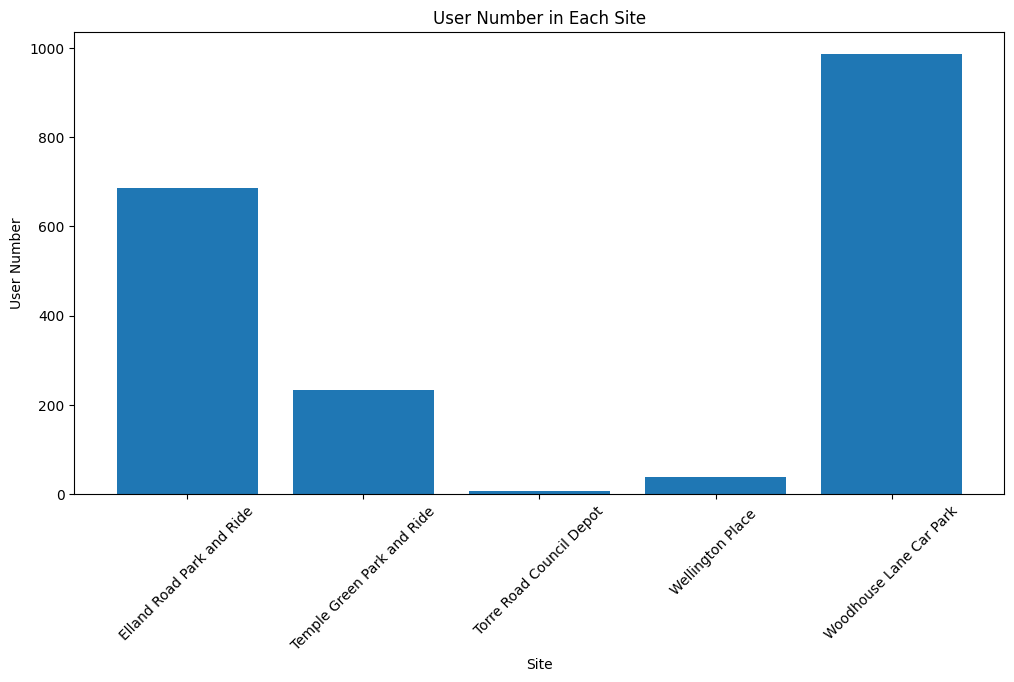

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(site_user_counts['site'], site_user_counts['user_id'])
plt.xlabel('Site')
plt.ylabel('User Number')
plt.title('User Number in Each Site')
plt.xticks(rotation=45)
plt.show()

User number in Woodhouse and Elland Road is the largest two, way above other sites

**First use ANOVA to analyze to analyze whether the different features had a significant effect on the total charge.**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('total_kwh ~ C(site) + start_time + end_time + duration_hr', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                   sum_sq       df          F        PR(>F)
C(site)      2.351630e+04      4.0  83.577192  1.645514e-70
start_time   1.571862e+05   1074.0   2.080602  4.997801e-77
end_time     1.121176e+05   1186.0   1.343902  1.189958e-13
duration_hr  4.731513e+03      1.0  67.263387  2.515611e-16
Residual     1.426487e+06  20279.0        NaN           NaN


All factors (site, start_time, duration_hr and end_time) have a statistically significant association with the response variable total_kwh. Their extremely small p-values indicate that the observed relationships between each of these factors and total_kwh are unlikely to be due to random chance.

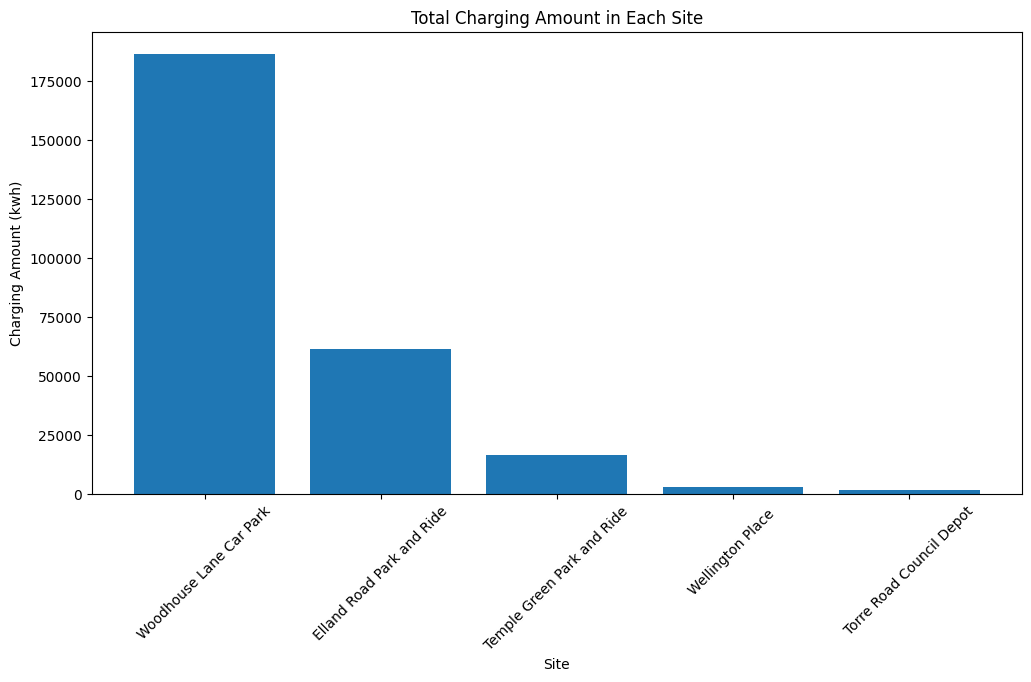

In [ ]:
site_total_charge = df.groupby('site')['total_kwh'].sum().reset_index()

site_total_charge = site_total_charge.sort_values(by='total_kwh', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(site_total_charge['site'], site_total_charge['total_kwh'])
plt.xlabel('Site')
plt.ylabel('Charging Amount (kwh)')
plt.title('Total Charging Amount in Each Site')
plt.xticks(rotation=45)
plt.show()


For the total charging amout, Woodhouse and Elland undoutablely became the top two, and the rest of the amout are distributed accordingly. However, Woodland is almost triple the amount of Elland.



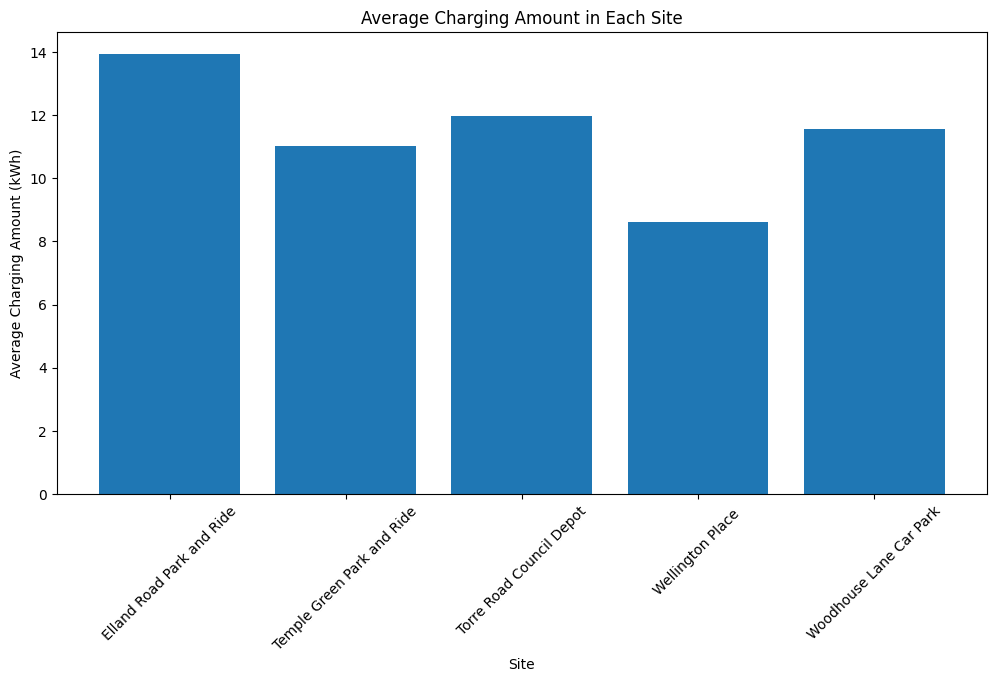

In [ ]:
site_avg_charge = df.groupby('site')['total_kwh'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(site_avg_charge['site'], site_avg_charge['total_kwh'])
plt.xlabel('Site')
plt.ylabel('Average Charging Amount (kWh)')
plt.title('Average Charging Amount in Each Site')
plt.xticks(rotation=45)
plt.show()

The average charging amount in each site dose not have too much difference, except for Wellington with the average of about 6 kWh.

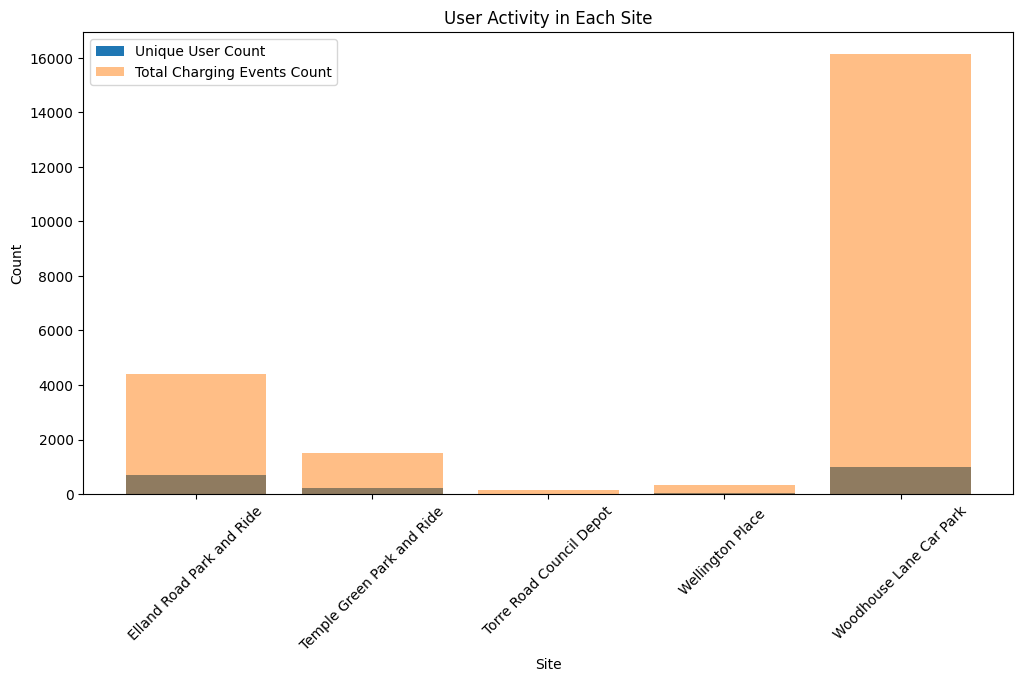

In [ ]:
site_user_activity = df.groupby('site')['user_id'].agg(['nunique', 'count', 'sum']).reset_index()
site_user_activity.columns = ['Site', 'Unique User Count', 'Total Charging Events Count', 'Total Charging Amount (kWh)']

# Bar chart to display user activity
plt.figure(figsize=(12, 6))
plt.bar(site_user_activity['Site'], site_user_activity['Unique User Count'], label='Unique User Count')
plt.bar(site_user_activity['Site'], site_user_activity['Total Charging Events Count'], label='Total Charging Events Count', alpha=0.5)
plt.xlabel('Site')
plt.ylabel('Count')
plt.title('User Activity in Each Site')
plt.legend()
plt.xticks(rotation=45)
plt.show()


The composition of the sites is dominated by regulars, and also in conjunction with the data above, although the total number of charges varies considerably from site to site, their averages are not very different. This indicates that the difference between sites is not due to the different consuming behavior.

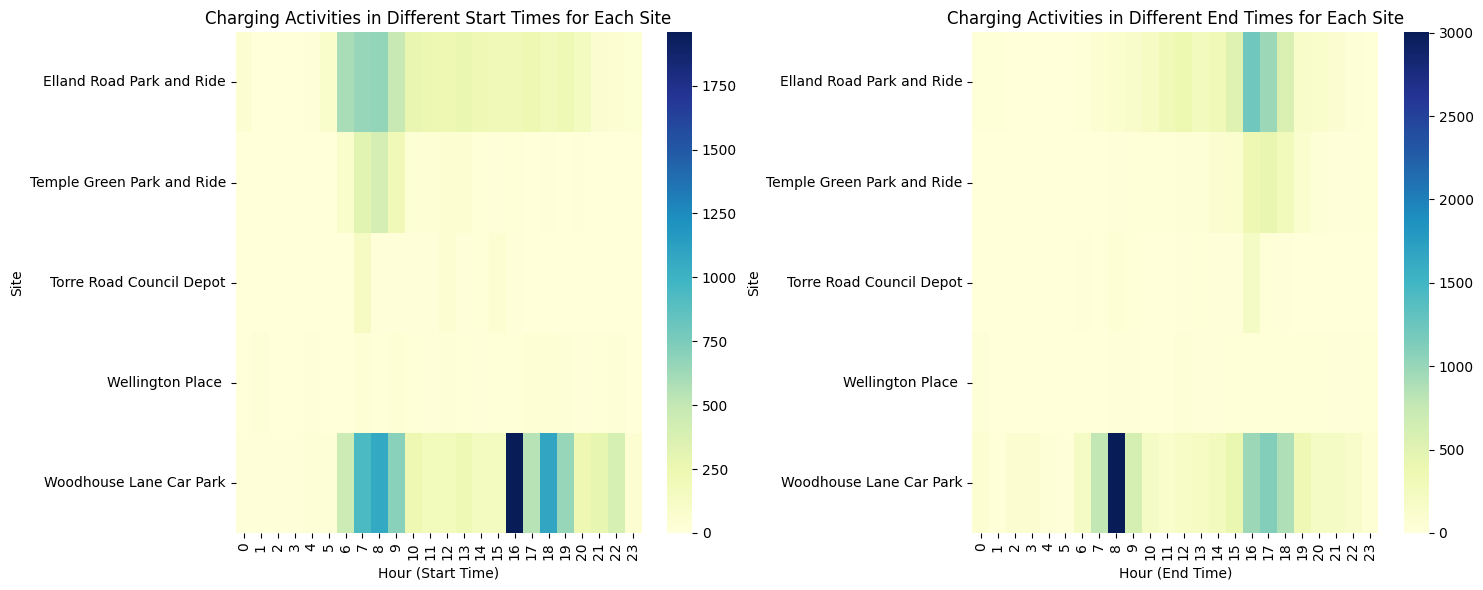

In [ ]:
df['start_datetime'] = pd.to_datetime(df['start_datetime'])
df['end_datetime'] = pd.to_datetime(df['end_datetime'])

# Extract hour for start time and end time
df['start_hour'] = df['start_datetime'].dt.hour
df['end_hour'] = df['end_datetime'].dt.hour

# Group data by site, start hour, and end hour to calculate total_kwh
site_hourly_charge = df.groupby(['site', 'start_hour', 'end_hour'])['total_kwh'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Start Time Heatmap
pivot_table_start = site_hourly_charge.pivot_table(index='site', columns='start_hour', values='total_kwh', fill_value=0)
sns.heatmap(pivot_table_start, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Charging Activities in Different Start Times for Each Site')
axes[0].set_xlabel('Hour (Start Time)')
axes[0].set_ylabel('Site')

# End Time Heatmap
pivot_table_end = site_hourly_charge.pivot_table(index='site', columns='end_hour', values='total_kwh', fill_value=0)
sns.heatmap(pivot_table_end, cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Charging Activities in Different End Times for Each Site')
axes[1].set_xlabel('Hour (End Time)')
axes[1].set_ylabel('Site')

plt.tight_layout()
plt.show()



Though the data is highly unbalananced, we can still capture some habits according to Woodhouse and Elland. People tend to choose charging and leaving time during 16-18 and 7-9, might to be in line with their working habits. In Woodhouse, people tend to charge their devices at night and leave in the morning, whereas in Elland, the situation is quite the opposite.

From the plot, ratio of unique user in Woodhouse is low , which means the users normally are less diverse, charging events are mostly contributed by frequent customers. In Elland and Temple, this ratio is relatively high, indecating these sites are more likely to be used by ramdom customers.

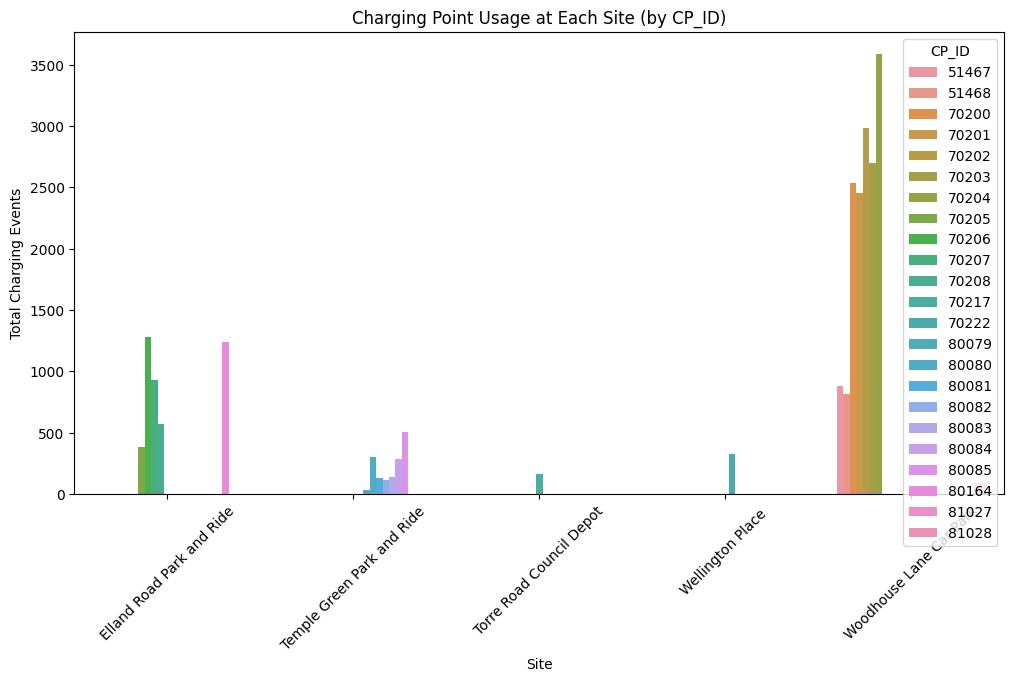

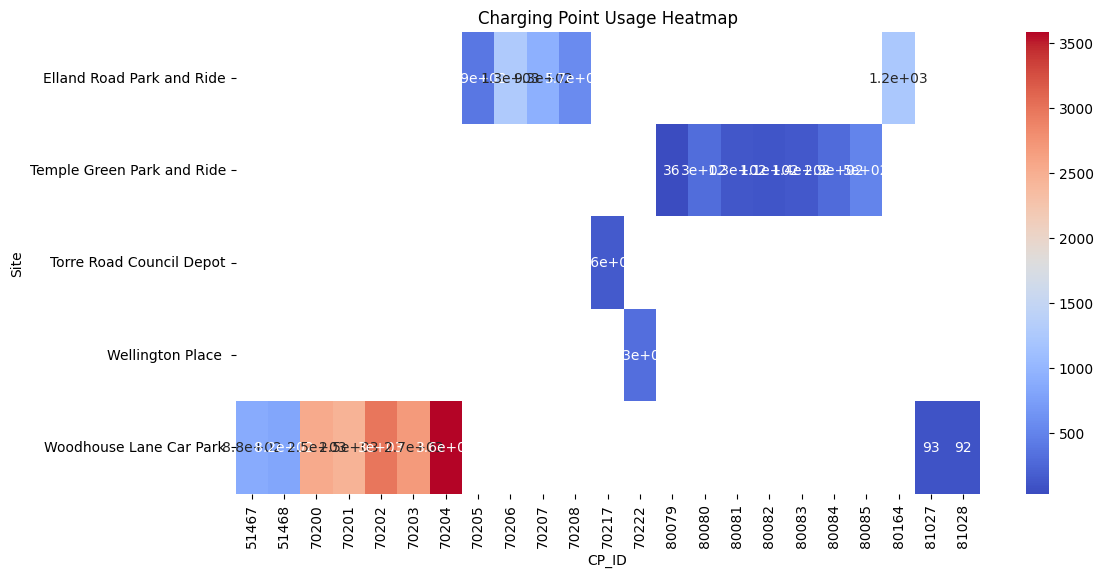

In [ ]:
cp_usage = df.groupby(['site', 'cp_id']).agg({
    'charging_event_id': 'count',  # Count the number of charging events
    'user_id': 'nunique'  # Count the number of unique users
}).reset_index()

# Rename columns for clarity
cp_usage.columns = ['Site', 'CP_ID', 'Total Charging Events', 'Unique Users']
# Create a bar chart to show usage metrics for each charging point (CP_ID) in each site
plt.figure(figsize=(12, 6))
sns.barplot(x='Site', y='Total Charging Events', hue='CP_ID', data=cp_usage)
plt.xlabel('Site')
plt.ylabel('Total Charging Events')
plt.title('Charging Point Usage at Each Site (by CP_ID)')
plt.xticks(rotation=45)
plt.legend(title='CP_ID')
plt.show()

# Create a heatmap to visualize usage metrics for each CP_ID in each site
heatmap_data = cp_usage.pivot_table(index='Site', columns='CP_ID', values='Total Charging Events')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True)
plt.title('Charging Point Usage Heatmap')
plt.show()


Woodhouse and Temple have the largest number of charging points, while Elland Park and Woodhouse experience relatively high usage. Especially in Woodhouse, some charging points like 70202 and 70204 are under extremly high usage.

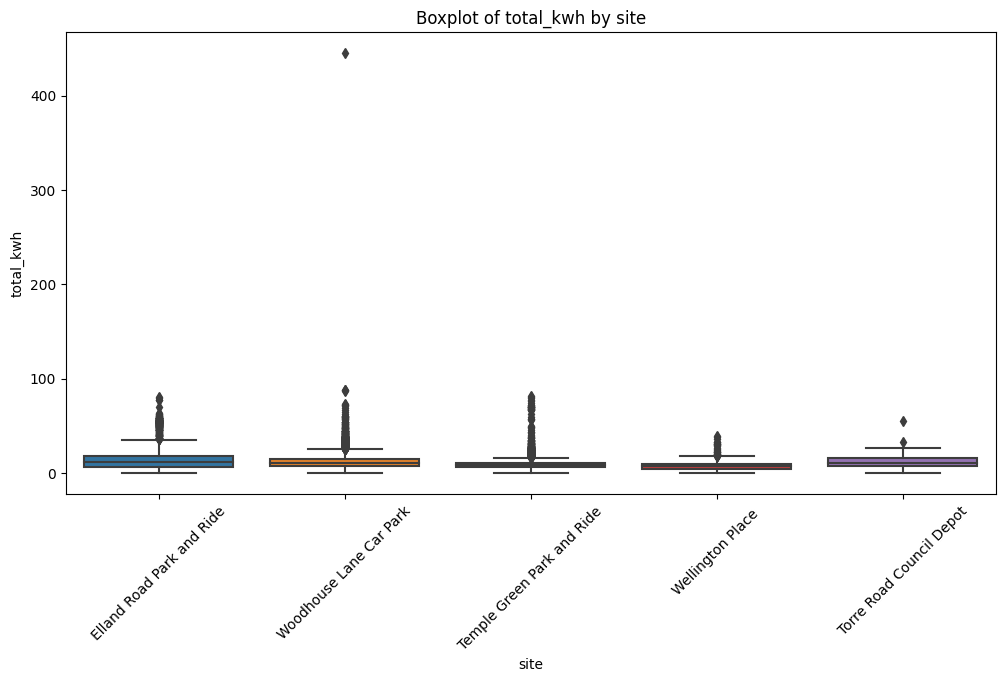

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='site', y='total_kwh', data=df)
plt.title('Boxplot of total_kwh by site')
plt.xticks(rotation=45)
plt.show()


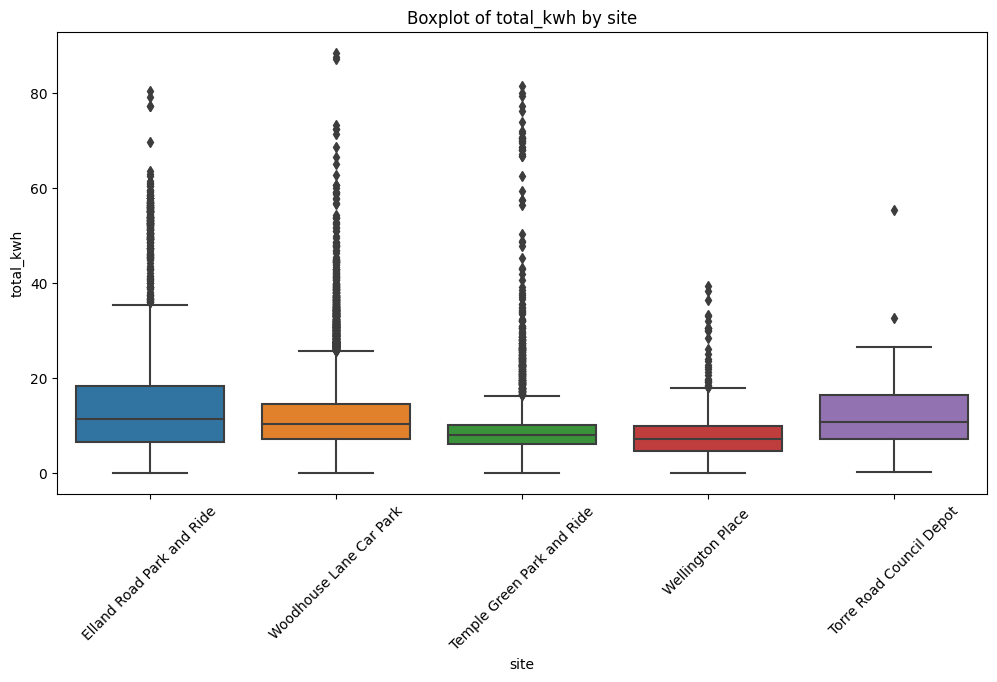

In [ ]:
# There is an outliner in total_kwh, drop it
df = df.drop(df['total_kwh'].idxmax())

plt.figure(figsize=(12, 6))
sns.boxplot(x='site', y='total_kwh', data=df)
plt.title('Boxplot of total_kwh by site')
plt.xticks(rotation=45)
plt.show()


* Woodhouse Lane Car Park has a wide IQR and a high density of data points, indicating a varied consumption pattern. This might reveal interesting clusters.

* Elland Road Park and Ride also has variability and several data points, which can be useful for clustering.

* Sites like Wellington Place and Torre Road Council Depot have narrower spreads, but if there's a high number of data points, they might still provide valuable clusters, especially if you're interested in more uniform patterns of consumption.


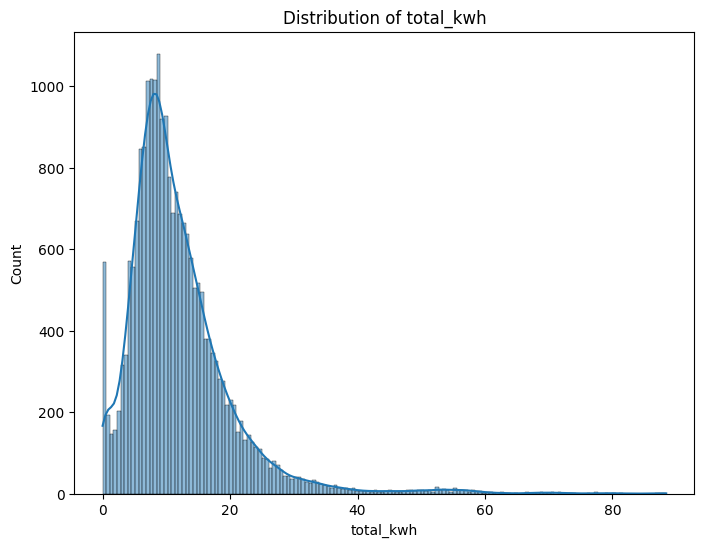

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_kwh'], kde=True)
plt.title('Distribution of total_kwh')
plt.show()


The distribution of total_kwh showed a peak with a long tail, which might indicate the presence of different user groups, e.g., heavy vs. light users. Clustering based on this variable might help in segmenting users based on their energy consumption patterns.

<ipython-input-22-57aaab33d113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


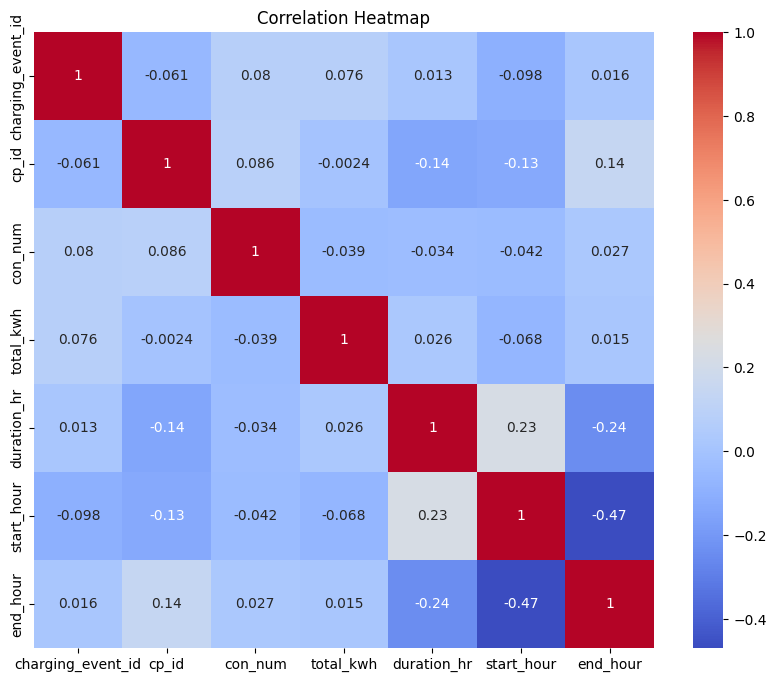

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Start Hour and End Hour: With a correlation of -0.47, this combination can help identify typical charging time frames. For instance, if most charging sessions start in the morning and end in the evening or vice versa.

**Do User Segmentation and Clustering, this aims to perform user segmentation to categorize users based on their charging habits, frequency, and preferences.**

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

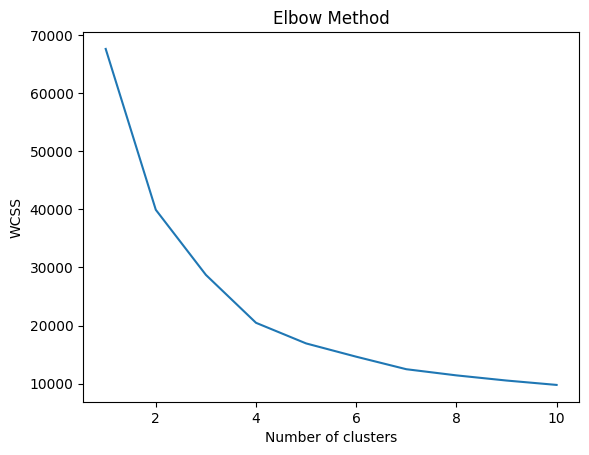

In [ ]:
selected_features = df[['total_kwh', 'start_hour', 'end_hour']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
# Determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Method to choose K
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

choose 4

In [ ]:
n = 4
kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding cluster information back to the dataframe
df['Cluster'] = clusters

# Displaying cluster centroids
print("Cluster Centroids:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Profiling clusters (using the mean for each feature)
cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles[['total_kwh', 'start_hour', 'end_hour']])

Cluster Centroids:
[[ 9.16545182 16.47172817 18.38996549]
 [11.96675312 17.64838829  7.85043843]
 [29.62822281  9.08748188 16.02706622]
 [ 8.83243066  8.36801116 15.24270603]]
         total_kwh  start_hour   end_hour
Cluster                                  
0         9.165452   16.471728  18.389965
1        11.964326   17.648592   7.850543
2        29.654190    9.094915  16.022760
3         8.838512    8.367449  15.243146


<ipython-input-26-613b8d1bd10b>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = df.groupby('Cluster').mean()


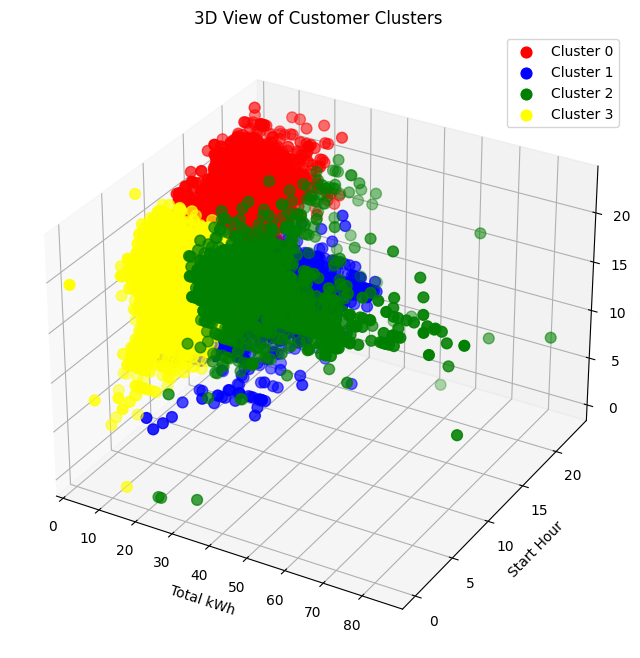

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'yellow']

for i in range(0,4):  # Assuming 5 clusters from 0 to 4
    ax.scatter(df['total_kwh'][df['Cluster'] == i],
               df['start_hour'][df['Cluster'] == i],
               df['end_hour'][df['Cluster'] == i],
               c=colors[i],
               label='Cluster ' + str(i),
               s=60)

ax.set_xlim([0, max(df['total_kwh'])])  # This sets the x-axis limits to [0, maximum value of total_kwh]
ax.set_xlabel('Total kWh')
ax.set_ylabel('Start Hour')
ax.set_zlabel('End Hour')
ax.set_title('3D View of Customer Clusters')
ax.legend()
plt.show()

* **Cluster 0: Late Afternoon to Early Evening Chargers**

* Habit: These users seem to charge their vehicles after typical working hours, suggesting they might be returning from work and plugging in their vehicles to recharge.
* Potential Customer Type:

 Professionals with 9-5 Jobs: They could be individuals with regular office hours, charging their vehicles once they get home.

 Daily Commuters: This cluster might represent users who have a daily commute and need a recharge every evening to prepare for the next day.
* **Cluster 1: Overnight Chargers**

* Habit: The main behavior here is overnight charging. This cluster plugs in their vehicles in the evening and lets them charge throughout the night.
* Potential Customer Type:

 Residential Users: These could be people who prefer charging at home overnight, ensuring their vehicle is ready for use the next day without any daytime interruptions.

 Long-Hour Workers: Individuals working long or irregular hours might find overnight charging convenient.
* **Cluster 2: Daytime High Consumers**

* Habit: This group starts charging in the morning and ends by the late afternoon, consuming a significant amount of energy.

* Potential Customer Type:

 Commercial Fleets: This pattern could be indicative of commercial vehicle fleets, like delivery trucks or taxis, which operate heavily during the day and need regular, high-energy charging sessions.

 High Mileage Users: These could be individuals or businesses whose vehicles cover a lot of ground during the day and hence require more extended charging periods.
* **Cluster 3: Early Birds**

* Habit: These users start their charging early in the morning and finish by mid-afternoon, with the lowest energy consumption.
* Potential Customer Type:
 Early Shift Workers: This cluster might represent those who begin their day early, such as workers in the healthcare, construction, or logistics sectors.

 Short Distance Commuters: Given the low energy consumption, these might be individuals who have short commutes or use their vehicles sparingly during the day.


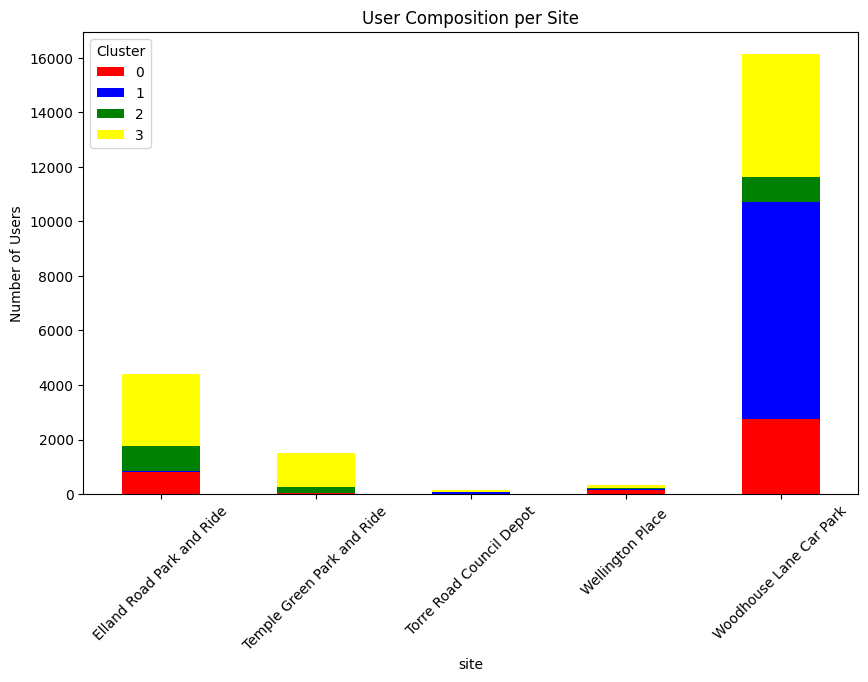

In [ ]:
# Use the groupby method to calculate the number of each user type at each site
user_composition = df.groupby(['site', 'Cluster']).size().unstack(fill_value=0)
color_mapping = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
# Visualization
colors = [color_mapping[col] for col in user_composition.columns]
user_composition.plot(kind='bar', stacked=True, figsize=(10, 6) , color=colors)
plt.title('User Composition per Site')
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.show()

In [ ]:
frequent_users = user_composition.sort_values(by=2, ascending=False)
print(frequent_users[1])

site
Woodhouse Lane Car Park       7981
Elland Road Park and Ride       20
Temple Green Park and Ride       0
Wellington Place                42
Torre Road Council Depot        53
Name: 1, dtype: int64


* Elland Road Park and Ride: This site primarily sees users from Cluster 0 and Cluster 2, with Cluster 3 being the majority. There's a very small representation from Cluster 3.

* Temple Green Park and Ride: Similarly to Elland Road, this site is dominated by users from Cluster 3. However, the representation of Cluster 2 users seems to be lower compared to Elland Road.

* Torre Road Council Depot: The number of users from all clusters is considerably lower than the previous two sites, since the customer number in this site is quite small.

* Wellington Place: almost same as the previous site with a small amount of customer

* Woodhouse Lane Car Park: This site has a balanced representation from Clusters 0 and 3, but it's majorly used by Cluster 1 users.

Summary Analysis:

Elland Road Park and Ride and Temple Green Park and Ride predominantly serve the Early Birds, which might be sites near residential areas or places where people start their day early.

Torre Road Council Depot and Willington Place
have almost no customer, might only be used for special event or far form the city center.

Woodhouse Lane Car Park has a diverse user base but is dominated by the Late Afternoon to Early Evening Chargers. This might indicate that it's near commercial areas or hubs where people return from work.



In [ ]:
df_1 = df[(df['site'] == 'Woodhouse Lane Car Park') & (df['Cluster'] == 1)]
df_1

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,...,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period,start_hour,end_hour,Cluster
29,316313,14Q3User 13,70203,2,2014-10-15,18:18,2014-10-16,04:33,9.37,Woodhouse Lane Car Park,...,2014-10-15 18:18:00,2014-10-16 04:33:00,10.250000,Wednesday,Thursday,evening,early morning,18,4,1
53,284020,14Q3User 42,70204,2,2014-08-21,16:03,2014-08-22,10:07,17.01,Woodhouse Lane Car Park,...,2014-08-21 16:03:00,2014-08-22 10:07:00,18.066667,Thursday,Friday,afternoon,morning,16,10,1
54,283482,14Q3User 42,70204,1,2014-08-20,16:58,2014-08-21,10:03,5.82,Woodhouse Lane Car Park,...,2014-08-20 16:58:00,2014-08-21 10:03:00,17.083333,Wednesday,Thursday,afternoon,morning,16,10,1
55,282972,14Q3User 42,70203,1,2014-08-19,16:55,2014-08-20,08:31,11.05,Woodhouse Lane Car Park,...,2014-08-19 16:55:00,2014-08-20 08:31:00,15.600000,Tuesday,Wednesday,afternoon,morning,16,8,1
57,282508,14Q3User 42,70203,1,2014-08-18,17:03,2014-08-19,08:48,12.28,Woodhouse Lane Car Park,...,2014-08-18 17:03:00,2014-08-19 08:48:00,15.750000,Monday,Tuesday,afternoon,morning,17,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22519,8116054,18Q3User 624,70201,1,2018-12-28,16:54,2018-12-31,07:58,9.83,Woodhouse Lane Car Park,...,2018-12-28 16:54:00,2018-12-31 07:58:00,63.066667,Friday,Monday,afternoon,morning,16,7,1
22521,8116568,18Q3User 624,70202,2,2018-12-28,22:00,2018-12-29,08:20,20.30,Woodhouse Lane Car Park,...,2018-12-28 22:00:00,2018-12-29 08:20:00,10.333333,Friday,Saturday,evening,morning,22,8,1
22526,8118076,18Q3User 615,70202,2,2018-12-29,16:29,2018-12-31,08:01,8.15,Woodhouse Lane Car Park,...,2018-12-29 16:29:00,2018-12-31 08:01:00,39.533333,Saturday,Monday,afternoon,morning,16,8,1
22535,8121670,18Q3User 613,70202,2,2018-12-31,13:15,2019-01-02,08:07,6.87,Woodhouse Lane Car Park,...,2018-12-31 13:15:00,2019-01-02 08:07:00,42.866667,Monday,Wednesday,afternoon,morning,13,8,1


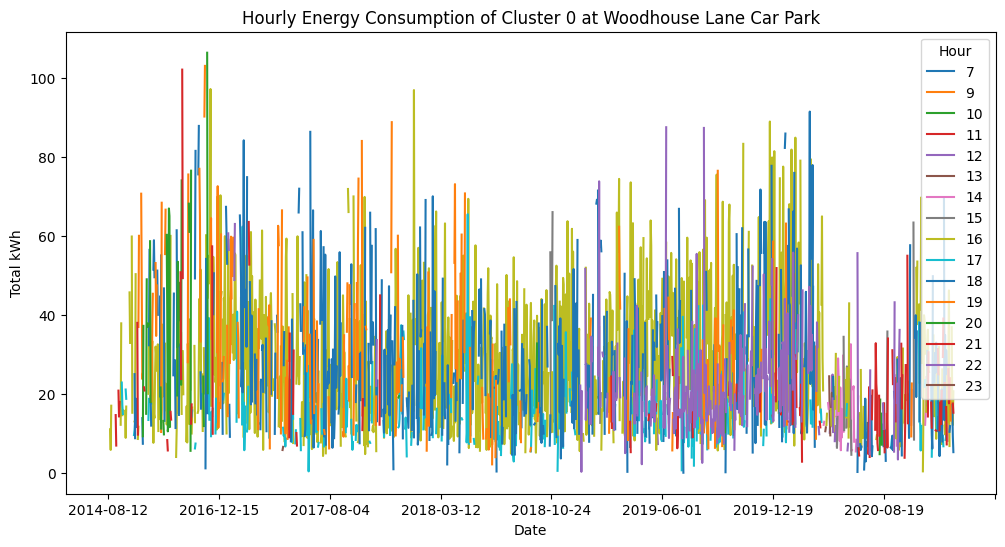

In [ ]:
df_1.groupby(['start_date', 'start_hour'])['total_kwh'].sum().unstack().plot(figsize=(12, 6))
plt.title('Hourly Energy Consumption of Cluster 0 at Woodhouse Lane Car Park')
plt.ylabel('Total kWh')
plt.xlabel('Date')
plt.legend(title='Hour', loc='upper right')
plt.show()


* Morning and Evening Peaks: There appear to be pronounced spikes in energy consumption during specific hours, which could correspond to morning and evening. This might indicate peak usage times or certain activities that demand more energy.
* Variability: The energy consumption seems highly variable, with certain dates seeing very high usage while others are much lower. This could be due to factors like holidays, weekends, events, or operational changes at the car park.
* Decreasing Trend Towards the End: Towards the latter part of the graph (2020), there's a noticeable decrease in energy consumption. This could be due to numerous reasons, such as operational changes, reduced capacity, external events, or even global phenomena like the COVID-19 pandemic which reduced mobility in many places during early 2020.

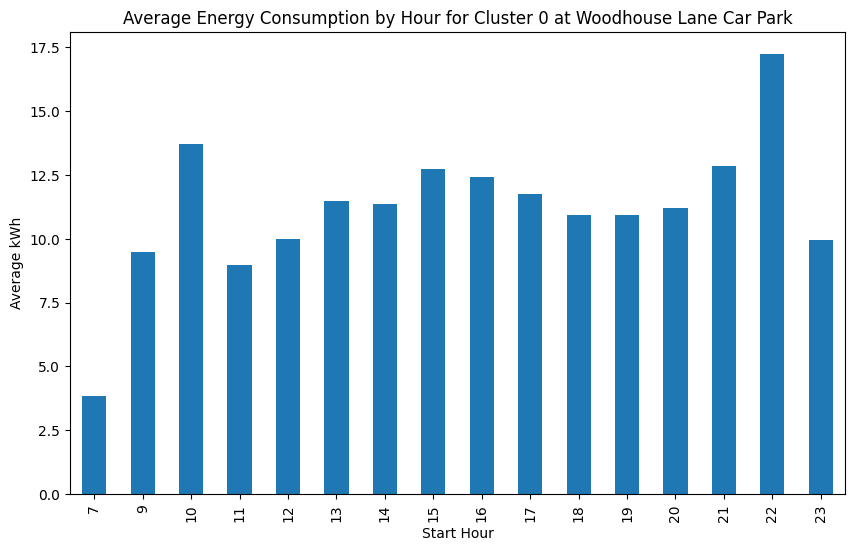

In [ ]:
hourly_consumption = df_1.groupby('start_hour')['total_kwh'].mean()
hourly_consumption.plot(kind='bar', figsize=(10, 6))
plt.title('Average Energy Consumption by Hour for Cluster 0 at Woodhouse Lane Car Park')
plt.ylabel('Average kWh')
plt.xlabel('Start Hour')
plt.show()


* Trend: Starting from the morning, there's a noticeable uptrend in energy consumption, reaching its peak at 11 PM. After the initial morning jump, the graph portrays a gradual increase, with minor ups and downs.

* Night-time Activity: There's a significant rise in energy consumption after 9 PM, culminating in the peak at 11 PM. This late surge could be indicative of night-time operations, activities, or specific user behaviors during these hours.

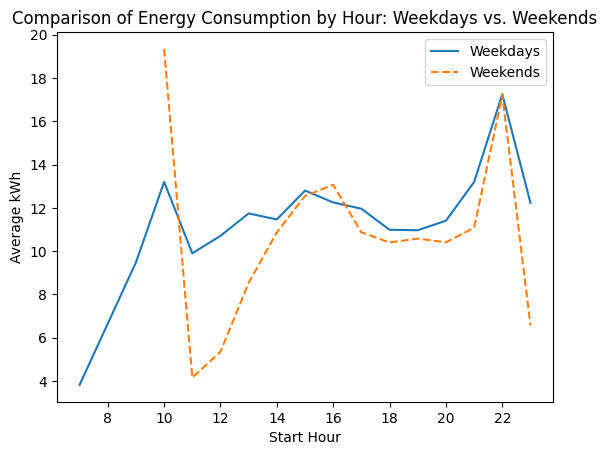

In [ ]:
df_1 = df_1.copy()
df_1['start_date'] = pd.to_datetime(df_1['start_date'])
df_1['day_of_week'] = df_1['start_date'].dt.dayofweek
# Assuming 0 is Monday and 6 is Sunday
weekdays = df_1[df_1['day_of_week'] < 5]
weekends = df_1[df_1['day_of_week'] >= 5]

weekdays.groupby('start_hour')['total_kwh'].mean().plot(label='Weekdays', legend=True)
weekends.groupby('start_hour')['total_kwh'].mean().plot(label='Weekends', legend=True, linestyle='--')
plt.title('Comparison of Energy Consumption by Hour: Weekdays vs. Weekends')
plt.ylabel('Average kWh')
plt.xlabel('Start Hour')
plt.show()


**Weekdays**:


* Morning Rise: High energy use starts at 8 AM.
* Steady Mid-Day: Energy use is stable from 10 AM to 6 PM.
* Evening Peak: Highest energy use is at 8 PM.
* Night Drop: Usage drops after 8 PM.


**Weekends**:


* Relaxed Morning: Energy use peaks later, at 10 AM.
* Varied Mid-Day: Energy goes up and down until evening.
* Late Peak: Very high energy use at 10 PM.


**Similarities**:
Both have two main peaks: one in the morning and one in the evening.
There's a mid-day period where energy use is either stable or drops a bit.

**Differences**:
On weekends, energy consumption peaks later in both the morning and evening compared to weekdays.
